In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import missingno
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from scipy.stats import gaussian_kde
from scipy.stats import skew,kurtosis
from sklearn.preprocessing import StandardScaler, RobustScaler


## For z_score
from scipy import stats
import os
# 운영체제별 한글 폰트 설정`
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
data1 = pd.read_csv('NHIS_OPEN_GJ_2017_100.csv',encoding='euc-kr')
data2 = pd.read_csv('NHIS_OPEN_GJ_2018_100.csv')
origin_data = pd.concat([data1,data2])

In [5]:
# 데이터 묶기 + 사용 컬럼만 빼내기 + 18년도 음주 Nan값 0 대체
data2['음주여부'] = data2['음주여부'].fillna(0)
data = pd.concat([data1,data2])

drop_col1 = ['기준년도','가입자일련번호','데이터공개일자', '시력(좌)','시력(우)','구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석', '시도코드', '혈색소', '청력(좌)', '청력(우)'] 
drop_col2 = ['총콜레스테롤','트리글리세라이드','HDL콜레스테롤', 'LDL콜레스테롤'] 


total_data = data.copy()
total_data = total_data.drop(drop_col1, 1)
total_data = total_data.drop(drop_col2, 1)
total_data = total_data.reset_index(drop=True, inplace=False)
total_data


,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,1,8,170,75,90.00000,120.00000,80.00000,99.00000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000
1,1,7,180,80,89.00000,130.00000,82.00000,106.00000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000
2,1,9,165,75,91.00000,120.00000,70.00000,98.00000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000
3,1,11,175,80,91.00000,145.00000,87.00000,95.00000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000
4,1,11,165,60,80.00000,138.00000,82.00000,101.00000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2,11,165,75,84.00000,110.00000,70.00000,107.00000,1.00000,0.70000,18.00000,15.00000,19.00000,1.00000,0.00000
1999996,1,7,170,75,88.00000,136.00000,88.00000,114.00000,1.00000,1.00000,25.00000,36.00000,90.00000,1.00000,1.00000
1999997,1,8,175,80,87.00000,162.00000,90.00000,98.00000,1.00000,0.90000,21.00000,15.00000,36.00000,2.00000,1.00000
1999998,1,11,165,70,80.20000,140.00000,98.00000,94.00000,1.00000,1.20000,20.00000,18.00000,14.00000,2.00000,0.00000


In [6]:

add_col = total_data['식전혈당(공복혈당)'].copy()

add_col[total_data['식전혈당(공복혈당)'] < 126] = 0
add_col[total_data['식전혈당(공복혈당)'] >= 126] = 1

total_data['당뇨여부'] = add_col


bmi_ref = total_data.loc[:,["체중(5Kg단위)", "신장(5Cm단위)"]]
bmi_df = (bmi_ref["체중(5Kg단위)"] / ((bmi_ref["신장(5Cm단위)"]/100)**2))
bmi_df = round(bmi_df)

add_col2 = bmi_df
total_data['BMI'] = add_col2
total_data

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부,BMI
0,1,8,170,75,90.00000,120.00000,80.00000,99.00000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000,0.00000,26.00000
1,1,7,180,80,89.00000,130.00000,82.00000,106.00000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000,0.00000,25.00000
2,1,9,165,75,91.00000,120.00000,70.00000,98.00000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000,0.00000,28.00000
3,1,11,175,80,91.00000,145.00000,87.00000,95.00000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000,0.00000,26.00000
4,1,11,165,60,80.00000,138.00000,82.00000,101.00000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000,0.00000,22.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2,11,165,75,84.00000,110.00000,70.00000,107.00000,1.00000,0.70000,18.00000,15.00000,19.00000,1.00000,0.00000,0.00000,28.00000
1999996,1,7,170,75,88.00000,136.00000,88.00000,114.00000,1.00000,1.00000,25.00000,36.00000,90.00000,1.00000,1.00000,0.00000,26.00000
1999997,1,8,175,80,87.00000,162.00000,90.00000,98.00000,1.00000,0.90000,21.00000,15.00000,36.00000,2.00000,1.00000,0.00000,26.00000
1999998,1,11,165,70,80.20000,140.00000,98.00000,94.00000,1.00000,1.20000,20.00000,18.00000,14.00000,2.00000,0.00000,0.00000,26.00000


<AxesSubplot:>

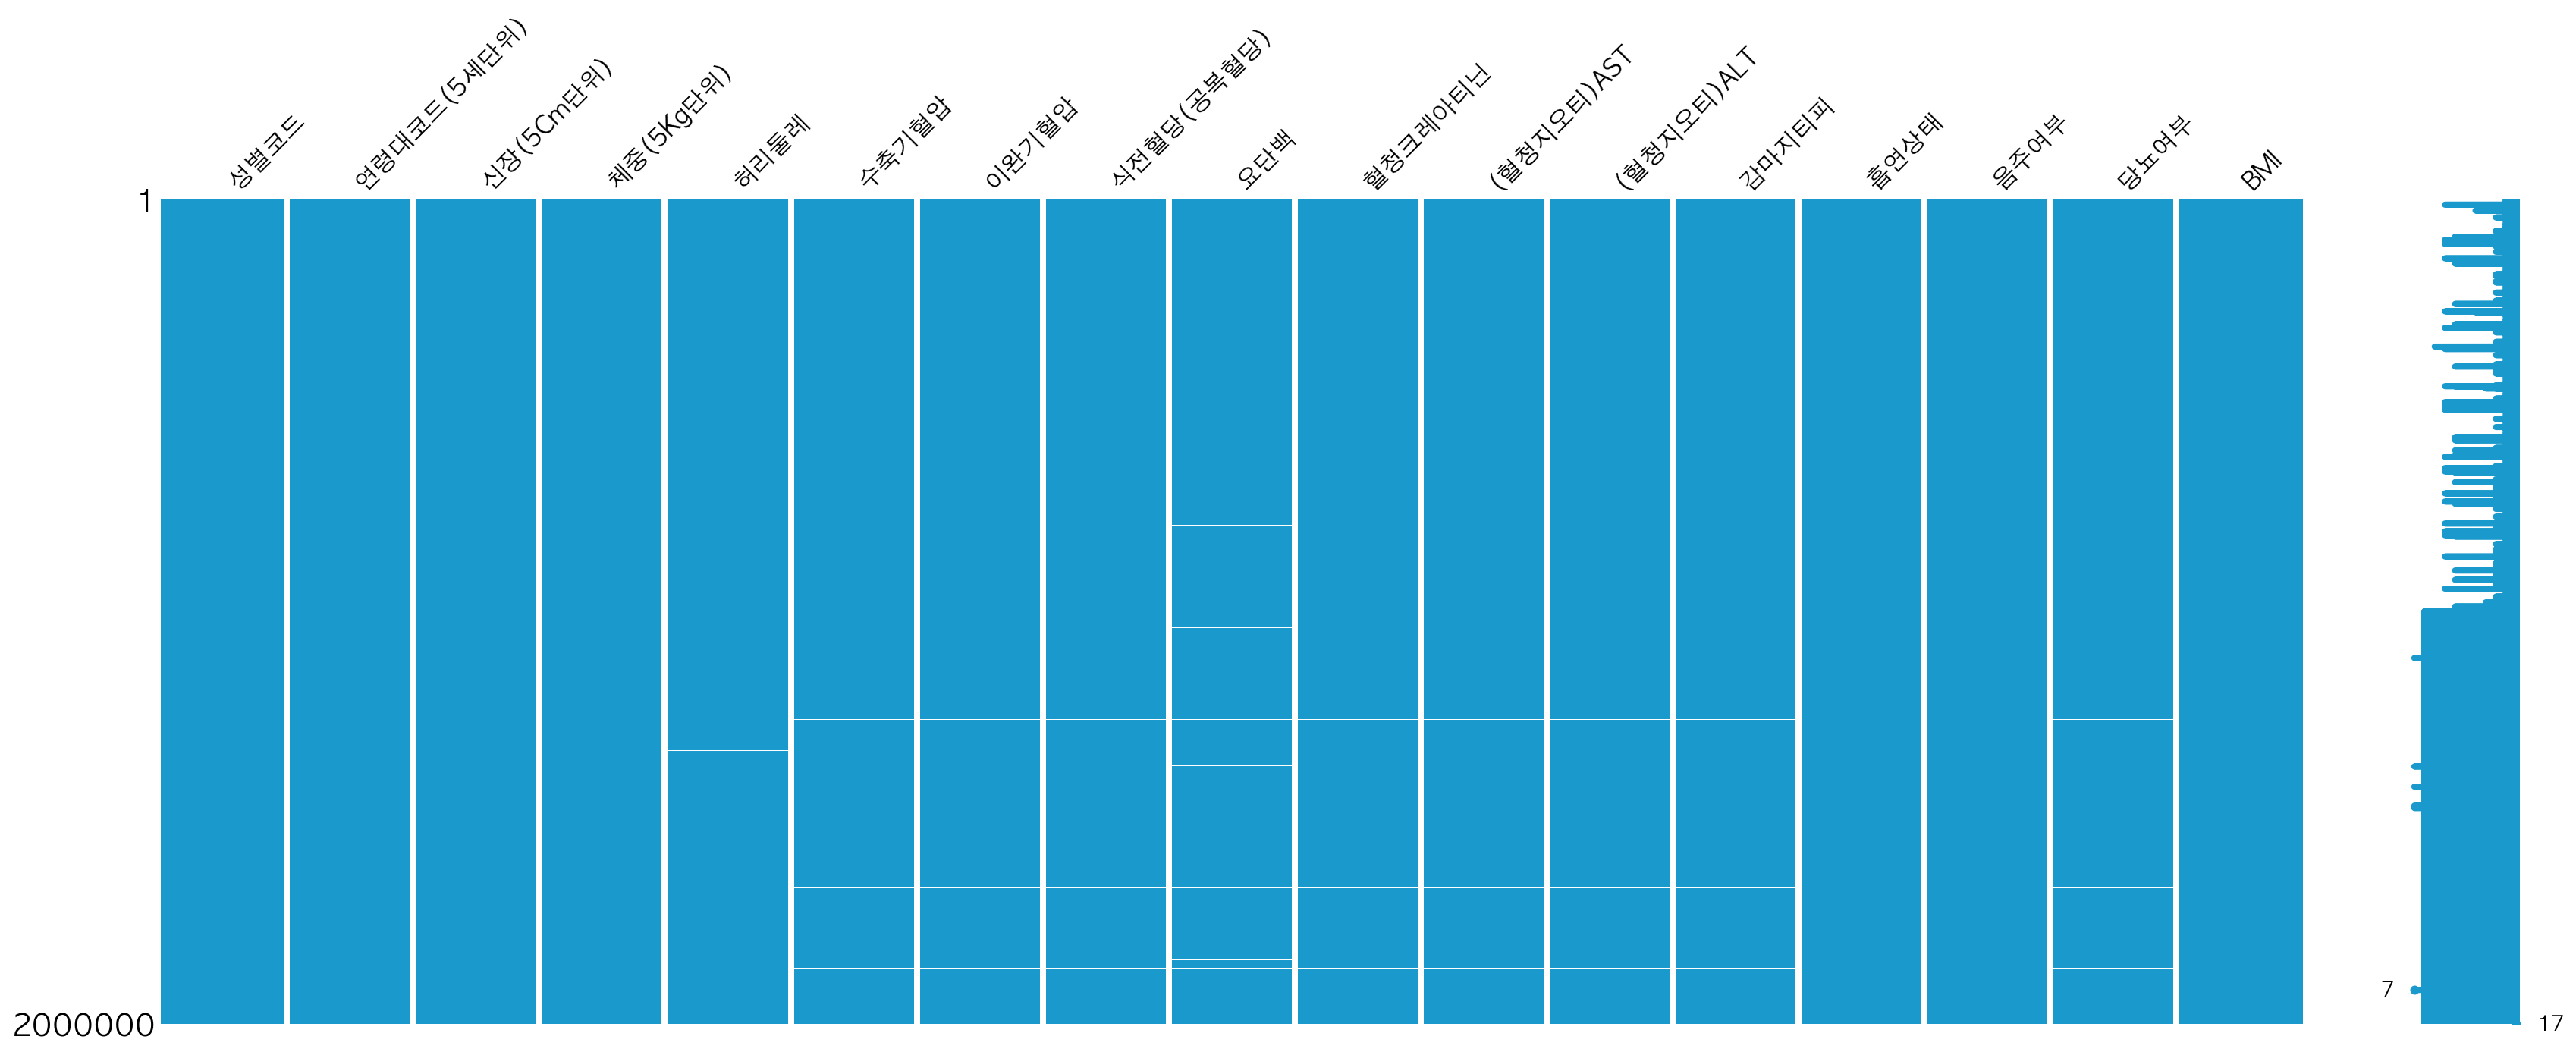

In [7]:
missingno.matrix(total_data,color=(0.1, 0.6, 0.8))

In [8]:
# 공복혈당 Nan 행 제거
drop_row_no_bs = total_data.dropna(axis=0, subset=['식전혈당(공복혈당)'])
total_data = drop_row_no_bs.copy()
total_data.describe()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부,BMI
count,1994043.00000,1994043.00000,1994043.00000,1994043.00000,1993371.00000,1994003.00000,1994003.00000,1994043.00000,1984769.00000,1994039.00000,1994041.00000,1994040.00000,1994037.00000,1993666.00000,1993507.00000,1994043.00000,1994043.00000
mean,1.46642,10.54746,162.28759,63.44967,81.33980,122.54775,76.06160,100.65998,1.09581,0.86330,26.14773,26.01796,37.39514,1.60792,0.57326,0.07818,23.91432
std,0.49887,2.85155,9.29855,12.62760,11.06695,14.59144,9.95393,24.18251,0.43906,0.49866,25.01266,26.78968,50.61607,0.81787,0.49460,0.26846,3.51795
min,1.00000,5.00000,125.00000,25.00000,1.00000,58.00000,27.00000,23.00000,1.00000,0.10000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,12.00000
25%,1.00000,8.00000,155.00000,55.00000,74.50000,112.00000,70.00000,89.00000,1.00000,0.70000,19.00000,15.00000,16.00000,1.00000,0.00000,0.00000,21.00000
50%,1.00000,11.00000,160.00000,60.00000,81.00000,121.00000,76.00000,96.00000,1.00000,0.80000,23.00000,20.00000,23.00000,1.00000,1.00000,0.00000,24.00000
75%,2.00000,13.00000,170.00000,70.00000,88.00000,131.00000,82.00000,105.00000,1.00000,1.00000,29.00000,30.00000,40.00000,2.00000,1.00000,0.00000,26.00000
max,2.00000,18.00000,190.00000,140.00000,999.00000,273.00000,185.00000,872.00000,6.00000,98.00000,9999.00000,7210.00000,999.00000,3.00000,1.00000,1.00000,46.00000


In [9]:
# 0인 셀을 갖는 행 제거
total_data = total_data.dropna(axis=0,how='any')
total_data = total_data.reset_index(drop=True, inplace=False)
total_data.isnull().sum()

total_data

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부,BMI
0,1,8,170,75,90.00000,120.00000,80.00000,99.00000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000,0.00000,26.00000
1,1,7,180,80,89.00000,130.00000,82.00000,106.00000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000,0.00000,25.00000
2,1,9,165,75,91.00000,120.00000,70.00000,98.00000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000,0.00000,28.00000
3,1,11,175,80,91.00000,145.00000,87.00000,95.00000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000,0.00000,26.00000
4,1,11,165,60,80.00000,138.00000,82.00000,101.00000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000,0.00000,22.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983221,2,11,165,75,84.00000,110.00000,70.00000,107.00000,1.00000,0.70000,18.00000,15.00000,19.00000,1.00000,0.00000,0.00000,28.00000
1983222,1,7,170,75,88.00000,136.00000,88.00000,114.00000,1.00000,1.00000,25.00000,36.00000,90.00000,1.00000,1.00000,0.00000,26.00000
1983223,1,8,175,80,87.00000,162.00000,90.00000,98.00000,1.00000,0.90000,21.00000,15.00000,36.00000,2.00000,1.00000,0.00000,26.00000
1983224,1,11,165,70,80.20000,140.00000,98.00000,94.00000,1.00000,1.20000,20.00000,18.00000,14.00000,2.00000,0.00000,0.00000,26.00000


<AxesSubplot:>

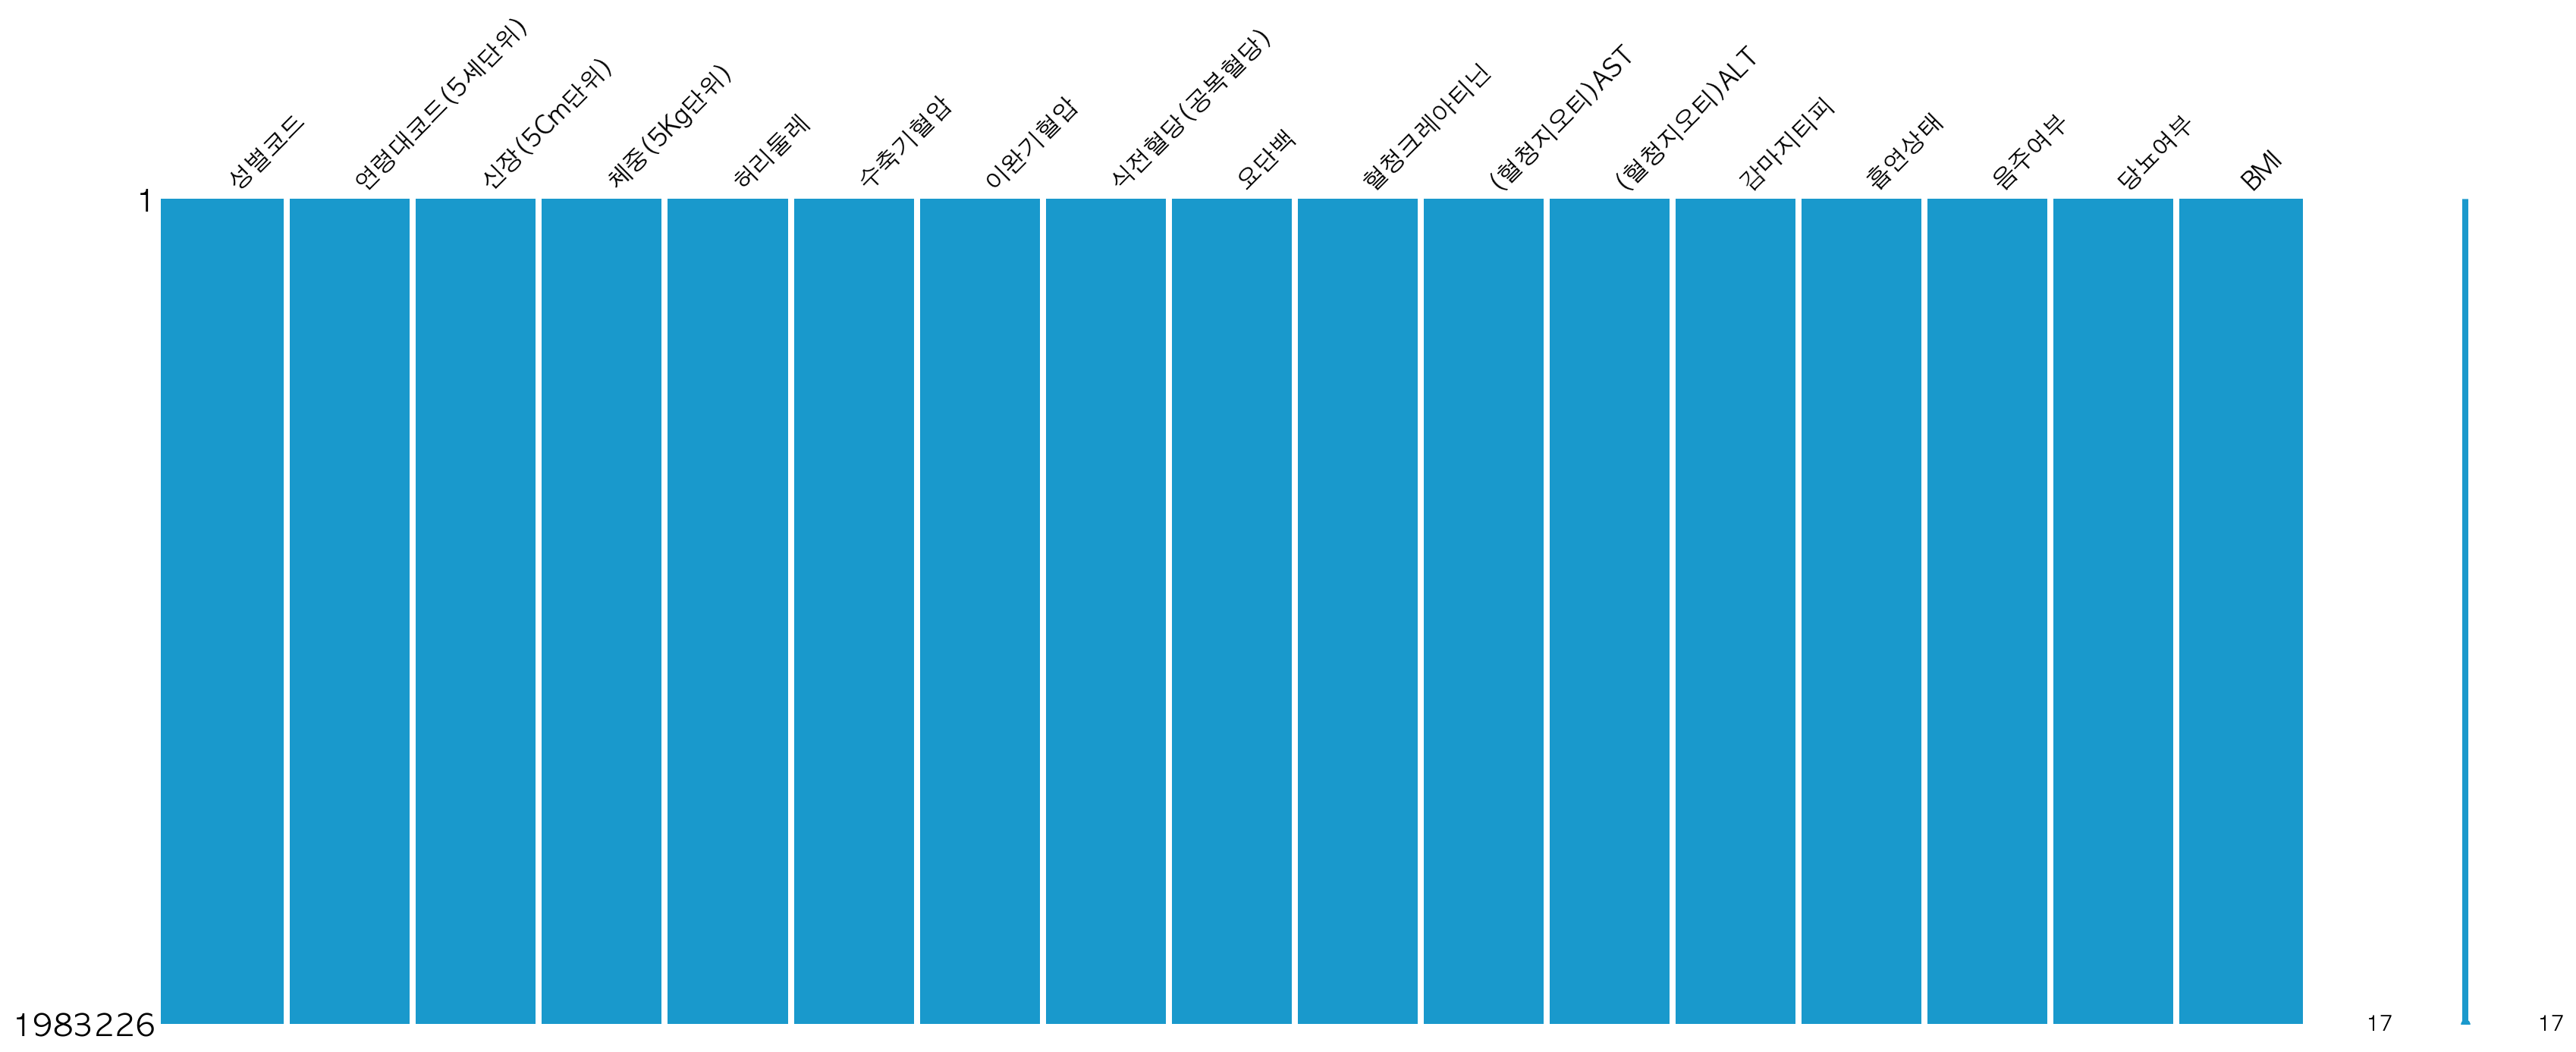

In [10]:
missingno.matrix(total_data,color=(0.1, 0.6, 0.8))

## Z-Score 이상치 제거

In [11]:
def z_score_method(df, variable_name):
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    print("index :",index)
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

 - 공복 혈당

In [12]:
bs_out = z_score_method(total_data, '식전혈당(공복혈당)')

index : 7


In [13]:
bs_out

[115,
 156,
 201,
 225,
 246,
 323,
 386,
 397,
 407,
 427,
 581,
 629,
 651,
 770,
 947,
 1030,
 1095,
 1109,
 1176,
 1250,
 1331,
 1385,
 1390,
 1397,
 1439,
 1508,
 1534,
 1566,
 1611,
 1692,
 1736,
 1755,
 1783,
 1812,
 1835,
 1857,
 1869,
 2108,
 2151,
 2241,
 2266,
 2304,
 2312,
 2313,
 2353,
 2380,
 2457,
 2459,
 2468,
 2598,
 2608,
 2616,
 2622,
 2649,
 2682,
 2697,
 2699,
 2742,
 2816,
 2841,
 2849,
 2850,
 2945,
 3029,
 3110,
 3182,
 3231,
 3243,
 3277,
 3329,
 3469,
 3500,
 3502,
 3540,
 3602,
 3642,
 3688,
 3787,
 3803,
 3881,
 3888,
 3959,
 3989,
 3997,
 4053,
 4188,
 4221,
 4224,
 4283,
 4306,
 4335,
 4363,
 4373,
 4395,
 4399,
 4429,
 4448,
 4453,
 4561,
 4627,
 4716,
 4848,
 4850,
 4867,
 4920,
 4939,
 4961,
 4972,
 4977,
 5043,
 5048,
 5106,
 5180,
 5271,
 5394,
 5423,
 5472,
 5530,
 5559,
 5616,
 5629,
 5640,
 5687,
 5716,
 5780,
 5957,
 5967,
 6025,
 6040,
 6043,
 6242,
 6395,
 6401,
 6441,
 6477,
 6510,
 6606,
 6627,
 6687,
 6702,
 6781,
 6805,
 6808,
 6810,
 6821,


In [14]:
len(bs_out)

36459

In [15]:
drop_df = total_data.drop(total_data.index[bs_out])
total_data = drop_df.copy()
total_data = total_data.reset_index(drop=True, inplace=False)

In [16]:
total_data.describe()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부,BMI
count,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000,1946767.00000
mean,1.46837,10.52160,162.29024,63.39654,81.24516,122.43897,76.01561,98.33382,1.09003,0.86081,26.05250,25.86002,36.86289,1.60439,0.57428,0.06080,23.89388
std,0.49900,2.84910,9.30033,12.60101,11.05856,14.53352,9.93434,15.73292,0.42151,0.48393,23.75815,26.51559,49.23035,0.81655,0.49445,0.23896,3.50706
min,1.00000,5.00000,125.00000,25.00000,1.00000,63.00000,27.00000,29.00000,1.00000,0.10000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,12.00000
25%,1.00000,8.00000,155.00000,55.00000,74.20000,112.00000,70.00000,89.00000,1.00000,0.70000,19.00000,15.00000,16.00000,1.00000,0.00000,0.00000,21.00000
50%,1.00000,10.00000,160.00000,60.00000,81.00000,120.00000,76.00000,96.00000,1.00000,0.80000,23.00000,20.00000,23.00000,1.00000,1.00000,0.00000,24.00000
75%,2.00000,13.00000,170.00000,70.00000,88.00000,131.00000,82.00000,104.00000,1.00000,1.00000,28.00000,30.00000,39.00000,2.00000,1.00000,0.00000,26.00000
max,2.00000,18.00000,190.00000,140.00000,999.00000,273.00000,185.00000,173.00000,6.00000,98.00000,9999.00000,7210.00000,999.00000,3.00000,1.00000,1.00000,46.00000


## BMI

- BMI 지수 이상치 제거
 (신장과 체중의 계산으로 나오는 수치이다. 각 속성을 따로 이상치 제거하지 않고 BMI 수치에 대해서만 이상치 제거를 진행하였다.)

In [17]:
bmi_out = z_score_method(total_data, 'BMI')
len(bmi_out)

index : 16


13536

In [18]:
1933231+13536

1946767

In [19]:
drop_bmi_outlier = total_data.drop(total_data.index[bmi_out])
drop_bmi_outlier = drop_bmi_outlier.reset_index(drop=True, inplace=False)
drop_bmi_outlier.describe()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부,BMI
count,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000,1933231.00000
mean,1.46896,10.53280,162.27329,63.15159,81.07744,122.36267,75.95943,98.28381,1.08940,0.86066,25.98271,25.67503,36.71314,1.60309,0.57385,0.06028,23.80781
std,0.49904,2.84912,9.29864,12.25526,10.89181,14.50046,9.90310,15.69969,0.41976,0.48018,23.74712,26.27696,49.17220,0.81584,0.49452,0.23801,3.36059
min,1.00000,5.00000,125.00000,25.00000,1.00000,63.00000,27.00000,29.00000,1.00000,0.10000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,14.00000
25%,1.00000,8.00000,155.00000,55.00000,74.00000,112.00000,70.00000,89.00000,1.00000,0.70000,19.00000,15.00000,16.00000,1.00000,0.00000,0.00000,21.00000
50%,1.00000,11.00000,160.00000,60.00000,81.00000,120.00000,76.00000,96.00000,1.00000,0.80000,23.00000,20.00000,23.00000,1.00000,1.00000,0.00000,24.00000
75%,2.00000,13.00000,170.00000,70.00000,87.30000,131.00000,82.00000,104.00000,1.00000,1.00000,28.00000,29.00000,39.00000,2.00000,1.00000,0.00000,26.00000
max,2.00000,18.00000,190.00000,120.00000,999.00000,270.00000,185.00000,173.00000,6.00000,98.00000,9999.00000,7210.00000,999.00000,3.00000,1.00000,1.00000,34.00000


In [20]:
print("BMI 분포의 외도: ",skew(total_data['BMI']))
print("BMI 분포의 첨도: ",kurtosis(total_data['BMI']))
print("---AFTER---")
print("BMI 분포의 외도: ",skew(drop_bmi_outlier['BMI']))
print("BMI 분포의 첨도: ",kurtosis(drop_bmi_outlier['BMI']))


BMI 분포의 외도:  0.5609297156825215
BMI 분포의 첨도:  0.5028692098929559
---AFTER---
BMI 분포의 외도:  0.35363293870781665
BMI 분포의 첨도:  -0.21328051819743132


1946767 1933231


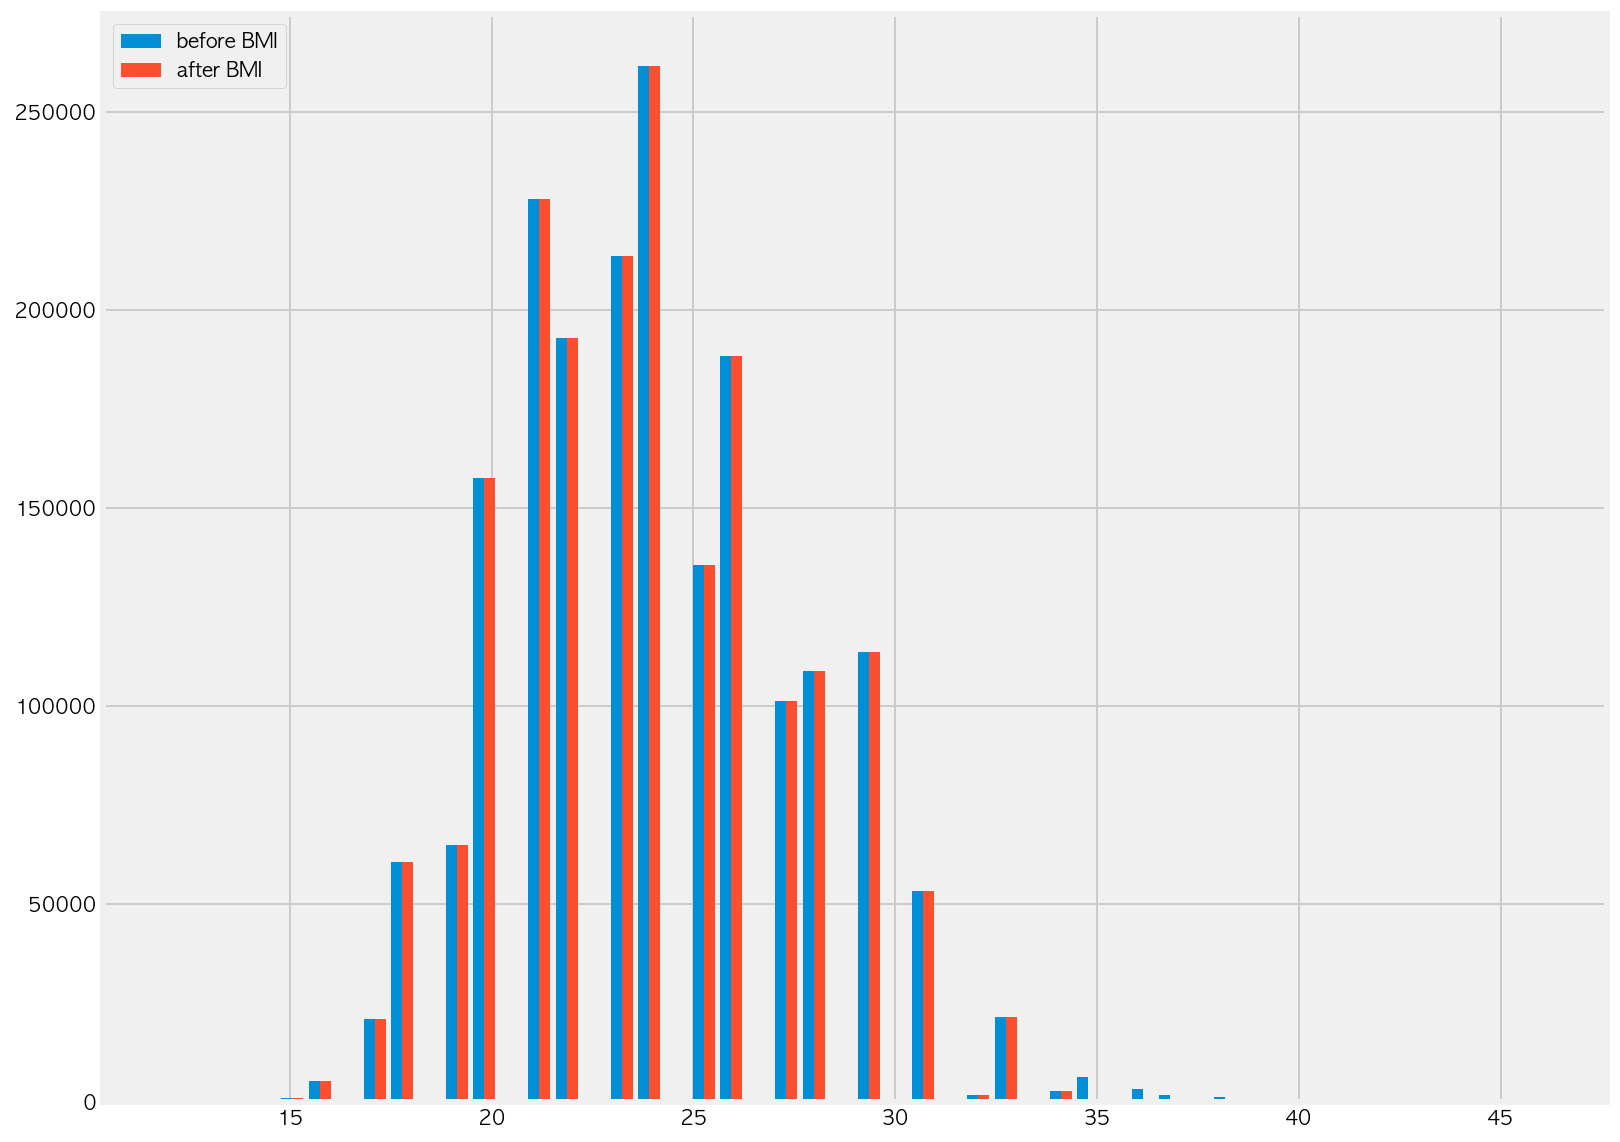

In [21]:
a = total_data['BMI']
b = drop_bmi_outlier['BMI']
print(len(a), len(b))


plt.figure(figsize=(12, 10))
plt.hist([a,b], bins=50, label=['before BMI','after BMI'])
plt.legend(loc='upper left')
plt.show()

## 허리둘레

In [22]:
waist_out = z_score_method(total_data, '허리둘레')
len(waist_out)

index : 4


2077

In [23]:
drop_waist_outlier = total_data.drop(total_data.index[waist_out])
drop_waist_outlier = drop_waist_outlier.reset_index(drop=True, inplace=False)
drop_waist_outlier.describe()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부,BMI
count,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000,1944690.00000
mean,1.46868,10.52362,162.28090,63.35104,81.17521,122.42651,76.00682,98.32524,1.08986,0.86074,26.03911,25.82568,36.83219,1.60400,0.57419,0.06069,23.88087
std,0.49902,2.84889,9.29692,12.51814,9.54332,14.52664,9.92850,15.72573,0.42103,0.48398,23.75233,26.46917,49.20135,0.81636,0.49447,0.23876,3.48320
min,1.00000,5.00000,125.00000,25.00000,48.10000,63.00000,27.00000,29.00000,1.00000,0.10000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,12.00000
25%,1.00000,8.00000,155.00000,55.00000,74.20000,112.00000,70.00000,89.00000,1.00000,0.70000,19.00000,15.00000,16.00000,1.00000,0.00000,0.00000,21.00000
50%,1.00000,10.00000,160.00000,60.00000,81.00000,120.00000,76.00000,96.00000,1.00000,0.80000,23.00000,20.00000,23.00000,1.00000,1.00000,0.00000,24.00000
75%,2.00000,13.00000,170.00000,70.00000,87.90000,131.00000,82.00000,104.00000,1.00000,1.00000,28.00000,30.00000,39.00000,2.00000,1.00000,0.00000,26.00000
max,2.00000,18.00000,190.00000,130.00000,114.40000,273.00000,185.00000,173.00000,6.00000,98.00000,9999.00000,7210.00000,999.00000,3.00000,1.00000,1.00000,44.00000


In [24]:
1944690+2077

1946767

In [25]:
print("허리둘레 분포의 외도: ",skew(total_data['허리둘레']))
print("허리둘레 분포의 첨도: ",kurtosis(total_data['허리둘레']))
print("---AFTER---")
print("허리둘레 분포의 외도: ",skew(drop_waist_outlier['허리둘레']))
print("허리둘레 분포의 첨도: ",kurtosis(drop_waist_outlier['허리둘레']))


허리둘레 분포의 외도:  20.36401708483794
허리둘레 분포의 첨도:  1680.02340415962
---AFTER---
허리둘레 분포의 외도:  0.12509030896265205
허리둘레 분포의 첨도:  -0.16681570463723983


1946767 1944690


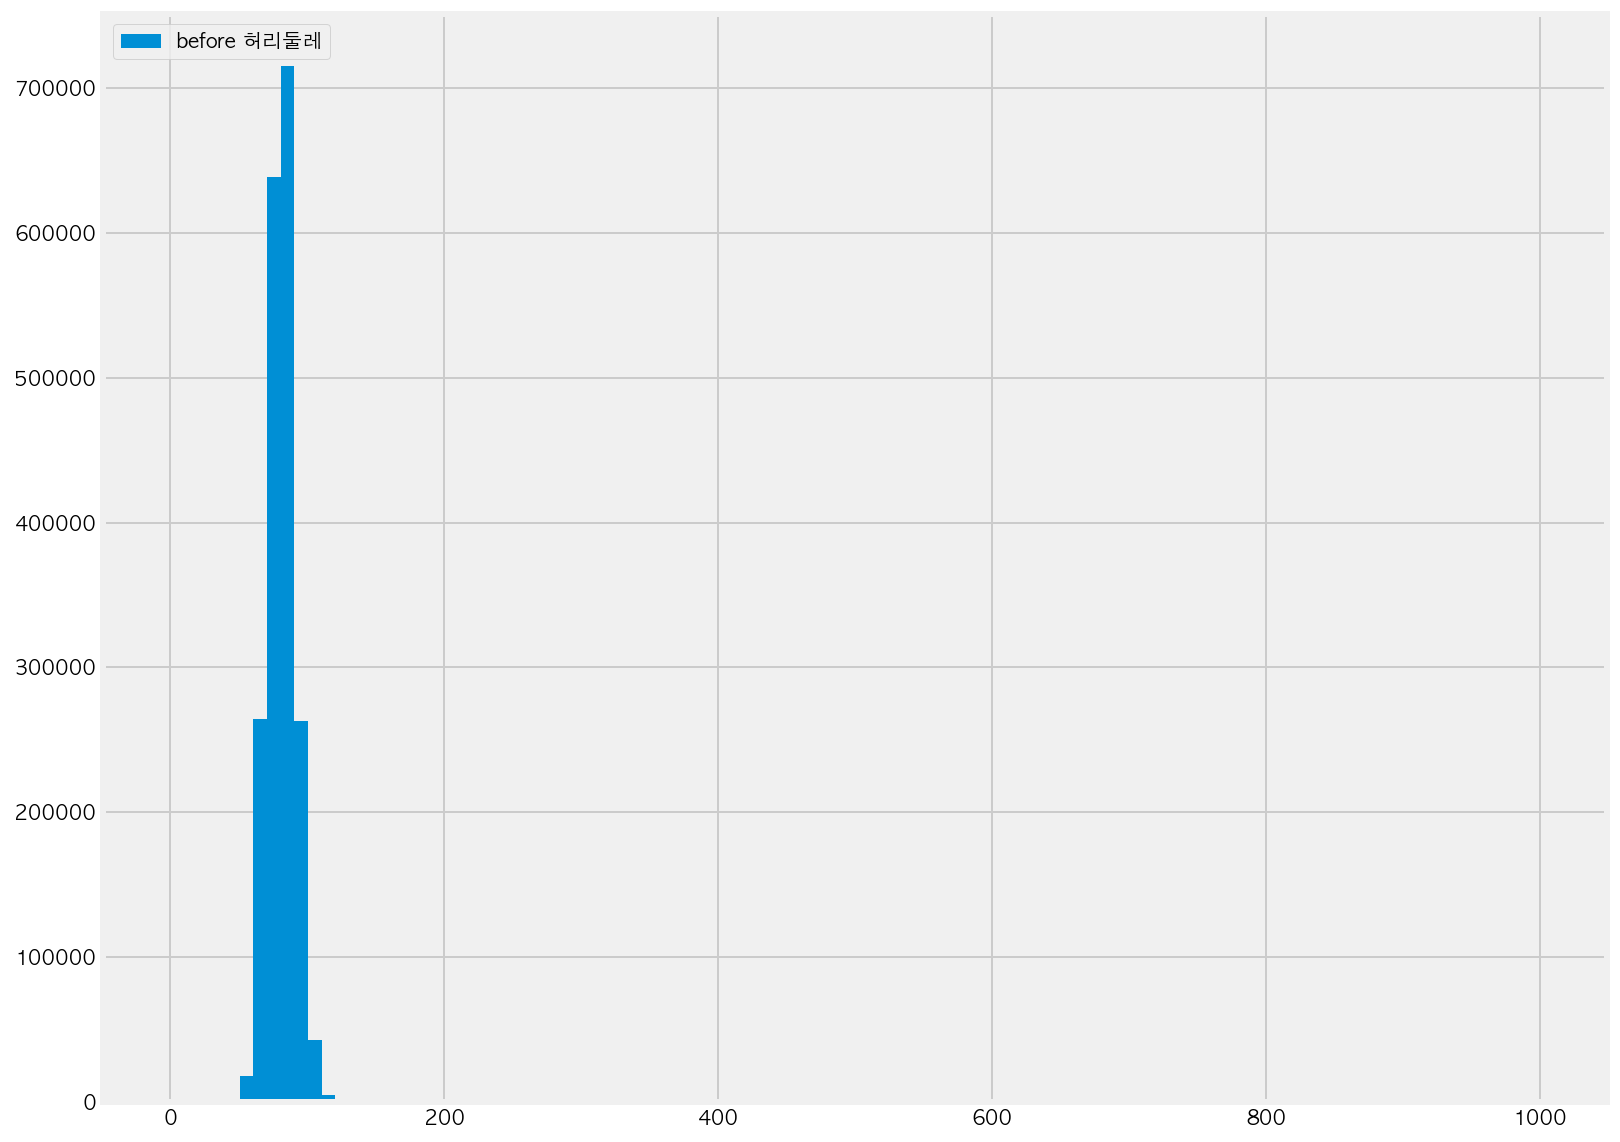

In [26]:
a = total_data['허리둘레']
b = drop_waist_outlier['허리둘레']
print(len(a), len(b))


plt.figure(figsize=(12, 10))
plt.hist(a, bins=100, label='before 허리둘레')
plt.legend(loc='upper left')
plt.show()

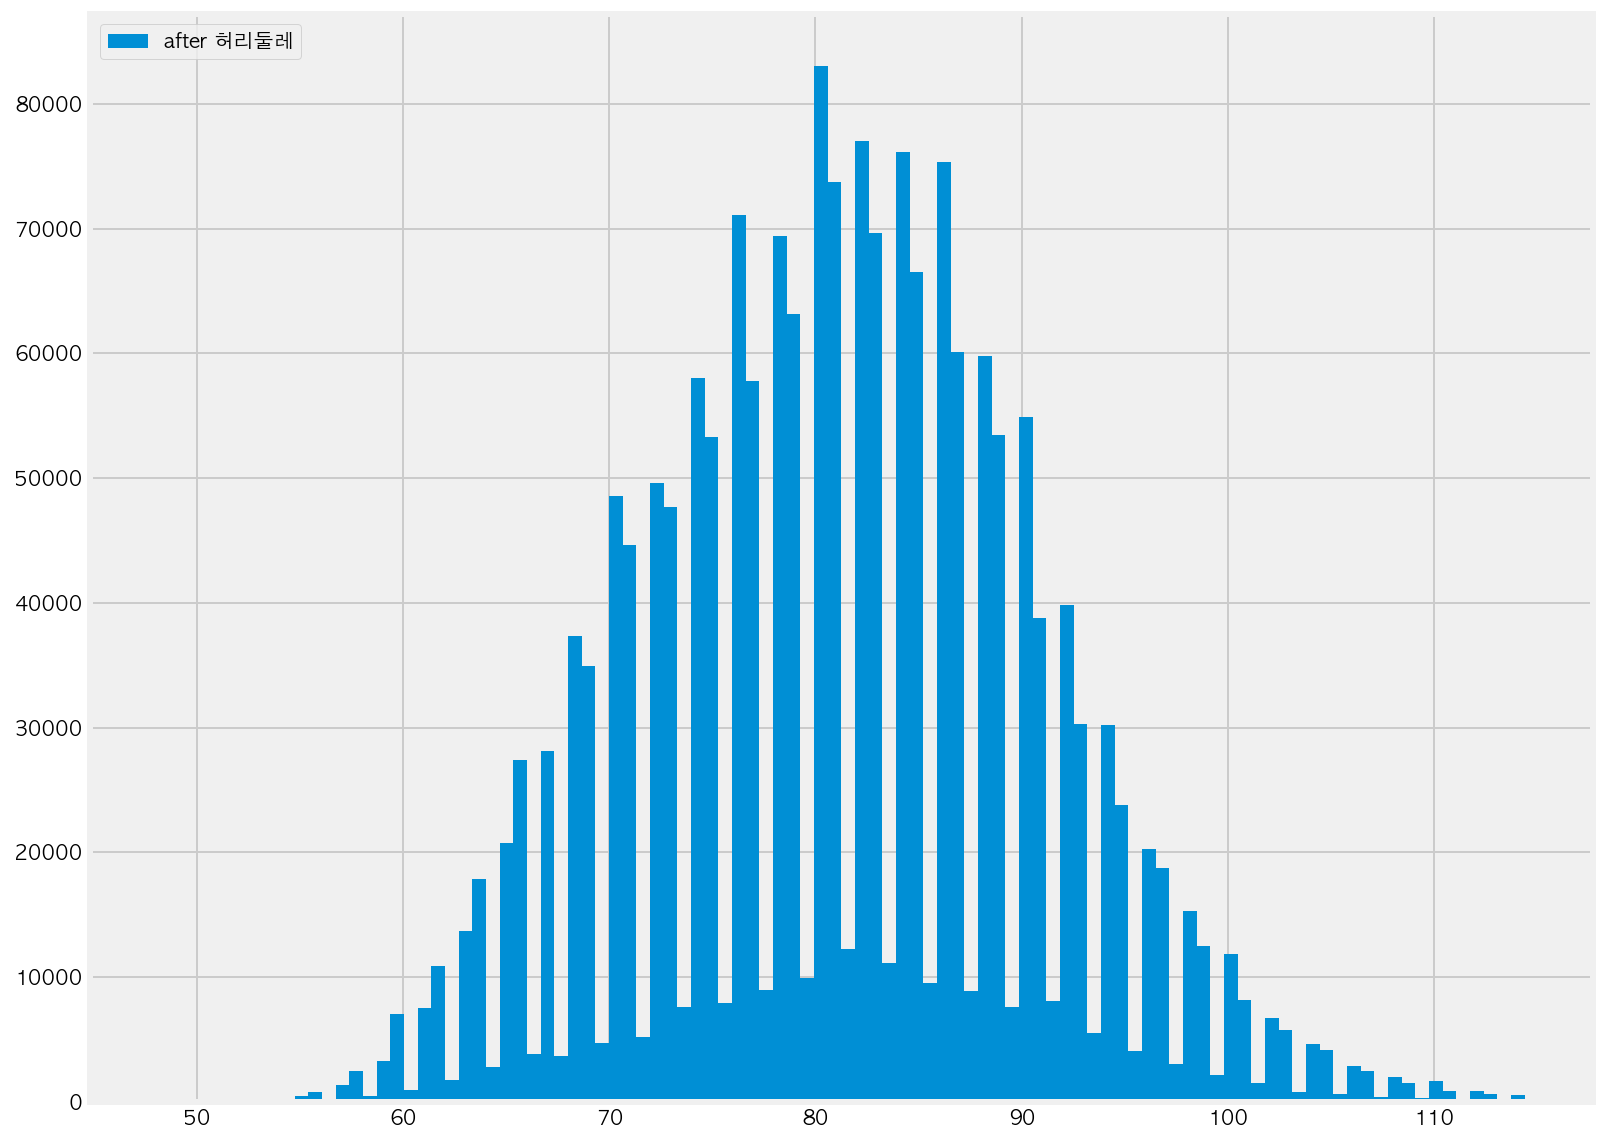

In [27]:
plt.figure(figsize=(12, 10))
plt.hist(b, bins=100, label='after 허리둘레')
plt.legend(loc='upper left')
plt.show()

In [28]:

before_tau_bmi, before_p_value_bmi = stats.kendalltau(total_data['식전혈당(공복혈당)'], total_data['BMI'])
print("전처리 전, BMI 켄달타우계수 tau: ",before_tau_bmi, "P-value", before_p_value_bmi)

after_tau_bmi, after_p_value_bmi = stats.kendalltau(drop_bmi_outlier['식전혈당(공복혈당)'], drop_bmi_outlier['BMI'])
print("전처리 후, BMI 켄달타우계수 tau: ",after_tau_bmi, "P-value", after_p_value_bmi)


전처리 전, BMI 켄달타우계수 tau:  0.16763379657587474 P-value 0.0
전처리 후, BMI 켄달타우계수 tau:  0.16633021391189753 P-value 0.0


In [29]:
before_tau_waist, before_p_value_waist = stats.kendalltau(total_data['식전혈당(공복혈당)'], total_data['허리둘레'])
print("전처리 전, 허리둘레 켄달타우계수 tau: ",before_tau_waist, "P-value", before_p_value_waist)

after_tau_waist, after_p_value_waist = stats.kendalltau(drop_waist_outlier['식전혈당(공복혈당)'], drop_waist_outlier['허리둘레'])
print("전처리 후, 허리둘레 켄달타우계수 tau: ",after_tau_waist, "P-value", after_p_value_waist)

전처리 전, 허리둘레 켄달타우계수 tau:  0.1923499998163941 P-value 0.0
전처리 후, 허리둘레 켄달타우계수 tau:  0.19219050248681863 P-value 0.0


Text(0, 0.5, '식전혈당(공복혈당)')

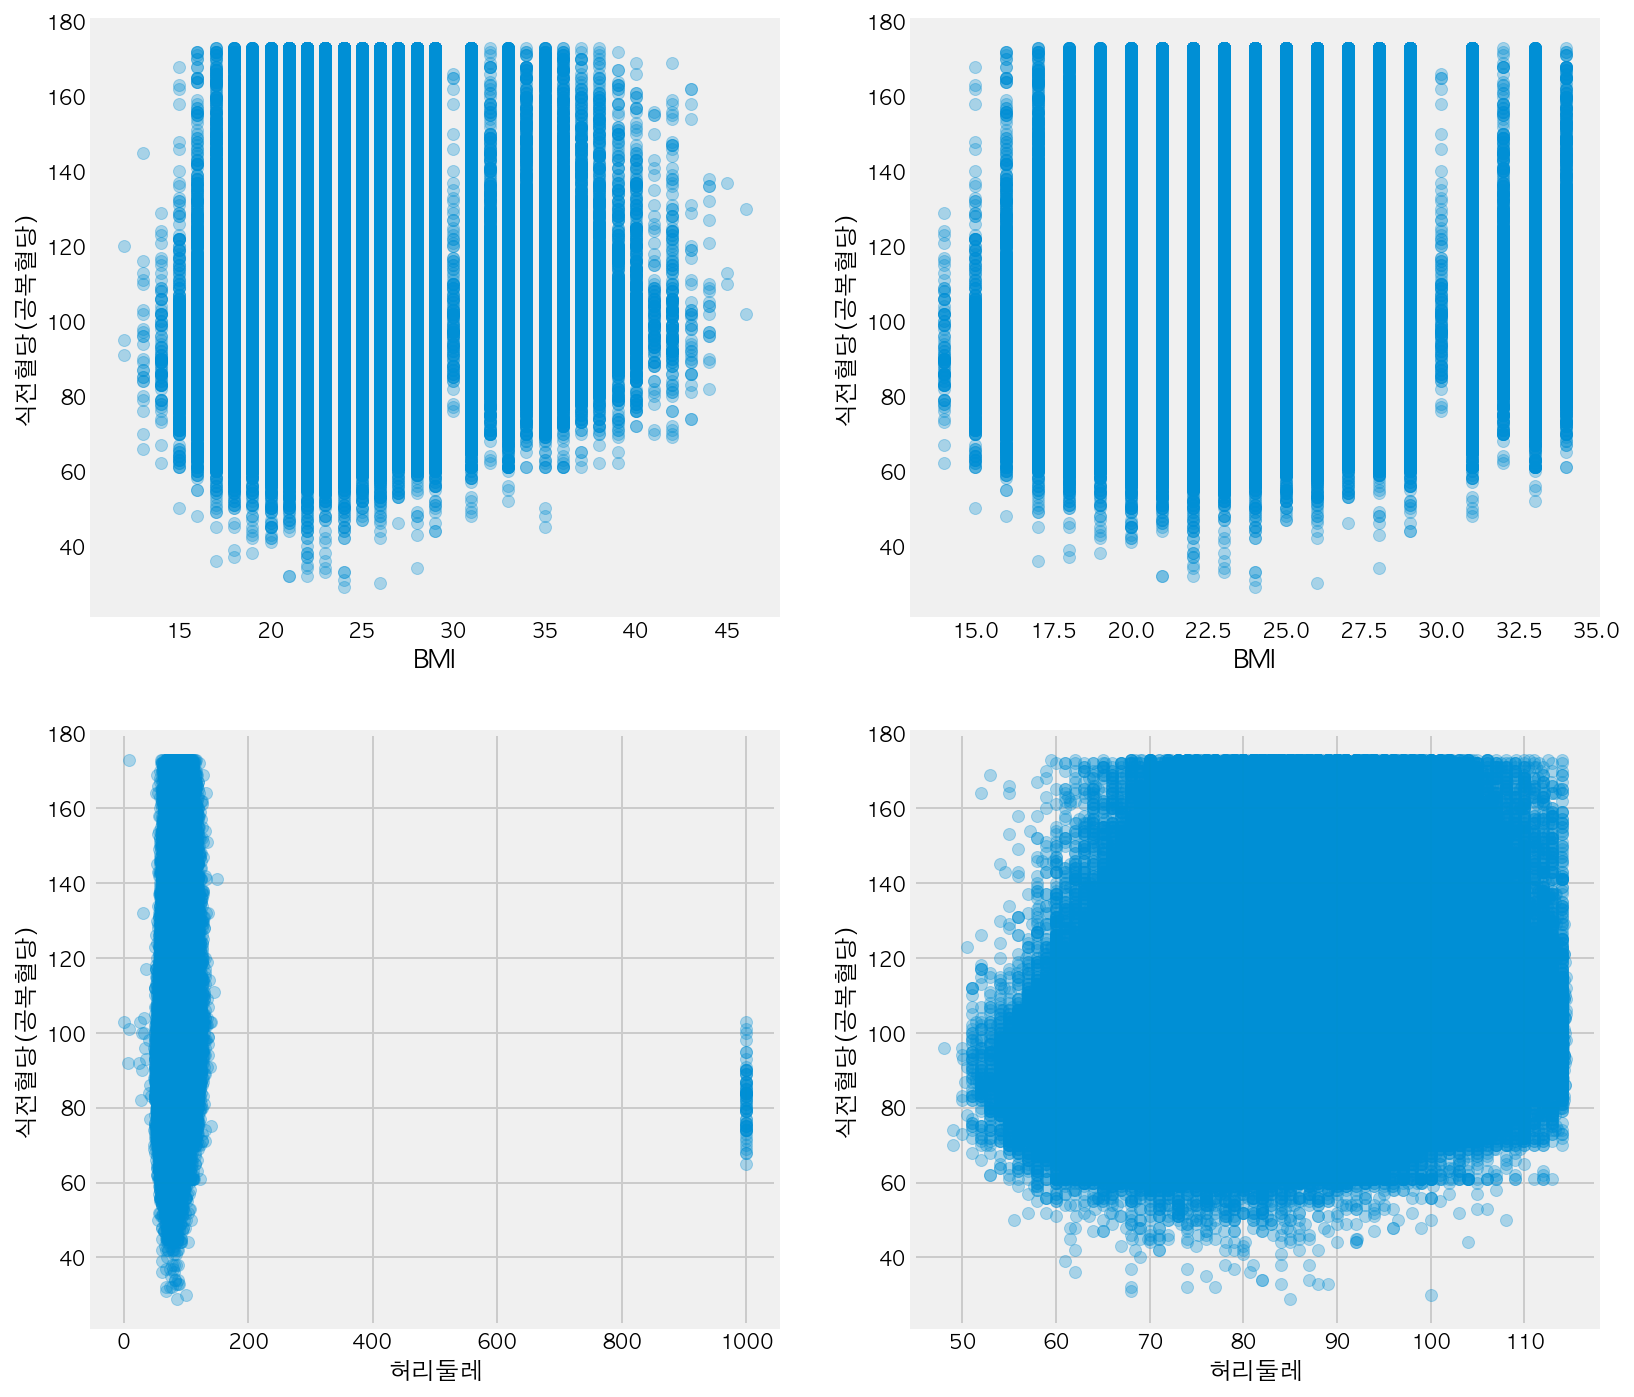

In [30]:
plt.figure(figsize=(12, 12))    


plt.subplot(221)
plt.scatter(total_data['BMI'], total_data['식전혈당(공복혈당)'], alpha=0.3) # 산점도
plt.xlabel("BMI")                  # x축 레이블 지정
plt.ylabel("식전혈당(공복혈당)")                   # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기

plt.subplot(222)
plt.scatter(drop_bmi_outlier['BMI'], drop_bmi_outlier['식전혈당(공복혈당)'], alpha=0.3) # 산점도
plt.xlabel("BMI")                  # x축 레이블 지정
plt.ylabel("식전혈당(공복혈당)")                   # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기

plt.subplot(223)
plt.scatter(total_data['허리둘레'], total_data['식전혈당(공복혈당)'], alpha=0.3) # 산점도
plt.xlabel("허리둘레")                  # x축 레이블 지정
plt.ylabel("식전혈당(공복혈당)") 
 
plt.subplot(224)
plt.scatter(drop_waist_outlier['허리둘레'], drop_waist_outlier['식전혈당(공복혈당)'], alpha=0.3) # 산점도
plt.xlabel("허리둘레")                  # x축 레이블 지정
plt.ylabel("식전혈당(공복혈당)") 

In [31]:
## 피어슨 상관 계수

df1 = drop_bmi_outlier[['식전혈당(공복혈당)','BMI']].copy()
df2 =  drop_waist_outlier[['식전혈당(공복혈당)','허리둘레']].copy()

In [32]:
df1_corr = df1.corr(method='pearson')
df2_corr = df2.corr(method='pearson')

print("BMI-공복혈당 피어슨 상관계수")
df1_corr


BMI-공복혈당 피어슨 상관계수


,식전혈당(공복혈당),BMI
식전혈당(공복혈당),1.00000,0.21279
BMI,0.21279,1.00000


In [33]:
print("허리둘레-공복혈당 피어슨 상관계수")
df2_corr

허리둘레-공복혈당 피어슨 상관계수


,식전혈당(공복혈당),허리둘레
식전혈당(공복혈당),1.00000,0.26361
허리둘레,0.26361,1.00000


In [35]:
df3 = drop_bmi_outlier[['당뇨여부','BMI']].copy()
df4 =  drop_waist_outlier[['당뇨여부','허리둘레']].copy()

stats.pointbiserialr(df3['당뇨여부'],df3['BMI'])

PointbiserialrResult(correlation=0.10480330569170175, pvalue=0.0)

In [37]:
stats.pointbiserialr(df4['허리둘레'],df4['당뇨여부'])

PointbiserialrResult(correlation=0.1419835660173205, pvalue=0.0)